In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo

import sys
sys.path.append("/path/to/plot_map")
from plot_map import plot_map

In [4]:
ds = xr.open_dataset('./reccap2_fig11.nc').astype('float32')
ds = ds.to_netcdf('./reccap2_fig11_v2.nc', encoding={k: dict(zlib=True) for k in ds})

In [3]:
ds = xr.open_dataset('reccap2_fig10.nc')
dss = ds.sel(lat = slice(0,80))

dss["so_regions"] = xr.DataArray(data = dss.mask_ice.data, dims = ["lat","lon"])

dss["so_regions"].values = np.where( dss.mask_stss == 1, 3,  dss.so_regions.data)
dss["so_regions"].values = np.where(dss.mask_spss.data == 1, 2, dss.so_regions.data)
dss["so_regions"].values = np.where( (dss.so_regions.data == 0) & (dss.lat2d < -55), 1, dss.so_regions.data)
dss["so_regions"].values = np.where( (dss.so_regions.data == 0), 4, dss.so_regions.data)

/Users/markhague2/WORK/code/plot_map.py:247: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(pcol, cax=cb_ax, extend = extend, orientation = colbar_ori)


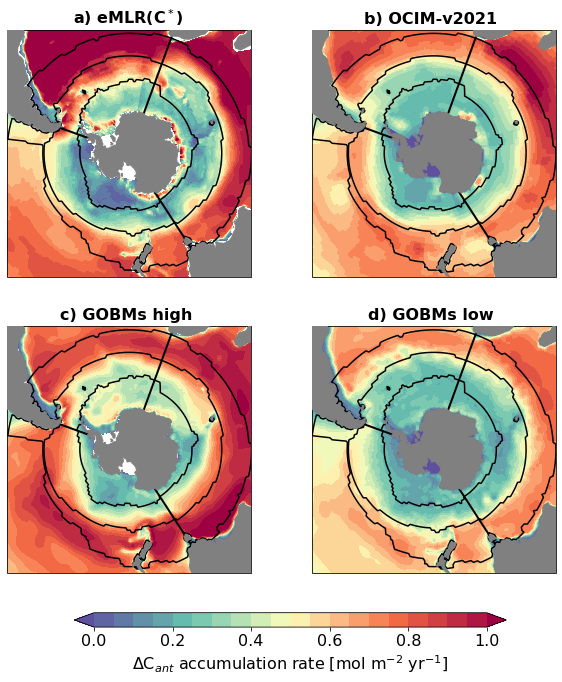

In [6]:
import matplotlib.colors as mc

ncols = 20
cmap = mc.LinearSegmentedColormap.from_list("", 
                                ['#5e4f9f','#65c0ae','#ffffbb','#f66e45','#9d0142'], N = ncols+2)

cont_levs = np.arange(0,1.05,0.05)

fig = plt.figure(figsize=[10, 10])
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

vmin_c, vmax_c = 0, 1.0
clevs = [1,2,3]


plot_map(ds = dss, dsg = dss, pos = 221, var = "delta_cant_emlrc", fig = fig,
             contour = True, cont_levs = cont_levs,
             colbar = True, colbar_loc = [0.225, 0.05, 0.6, 0.02],
             colbar_ori = 'horizontal', cbar_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1],
             cbar_label= '$\Delta$C$_{ant}$ accumulation rate [mol m$^{-2}$ yr$^{-1}$]', 
             
            lonname='lon2d', latname='lat2d', grid = "standard", ncols = ncols,
             extend = 'both', cmap_lib='matplotlib',
            clrmap = cmap,  title = "a) eMLR(C$^*$) ", proj_shape = "square",
            vmin = vmin_c, vmax = vmax_c, label_lines = False,
            varc = "so_regions", clevs = clevs, clabel = False, LAT_N = -35,
            label_basins = True, basin_lons = [20,147,-70],
            label_grid_lines = False)

plot_map(ds = dss, dsg = dss, pos = 222, var = "delta_cant_ocim", fig = fig,
             contour = True, cont_levs = cont_levs,
             colbar = False,
            lonname='lon2d', latname='lat2d', grid = "standard", ncols = ncols,
             extend = 'both', cmap_lib='matplotlib',
            clrmap = cmap,  title = "b) OCIM-v2021 ", proj_shape = "square",
            vmin = vmin_c, vmax = vmax_c, label_lines = False, LAT_N = -35,
            varc = "so_regions", clevs = clevs, clabel = False,
            label_basins = True, basin_lons = [20,147,-70],
            label_grid_lines = False)

plot_map(ds = dss, dsg = dss, pos = 223, var = "delta_cant_high", fig = fig,
             contour = True, cont_levs = cont_levs,
             colbar = False,
            lonname='lon2d', latname='lat2d', grid = "standard", ncols = ncols,
             extend = 'both', cmap_lib='matplotlib',
            clrmap = cmap,  title = "c) GOBMs high ", proj_shape = "square",
            vmin = vmin_c, vmax = vmax_c, label_lines = False, LAT_N = -35,
            varc = "so_regions", clevs = clevs, clabel = False,
            label_basins = True, basin_lons = [20,147,-70],
            label_grid_lines = False)

plot_map(ds = dss, dsg = dss, pos = 224, var = "delta_cant_low", fig = fig,
             contour = True, cont_levs = cont_levs,
             colbar = False,
            lonname='lon2d', latname='lat2d', grid = "standard", ncols = ncols,
             extend = 'both', cmap_lib='matplotlib',
            clrmap = cmap,  title = "d) GOBMs low ", proj_shape = "square",
            vmin = vmin_c, vmax = vmax_c, label_lines = False, LAT_N = -35,
            varc = "so_regions", clevs = clevs, clabel = False,
            label_basins = True, basin_lons = [20,147,-70],
            label_grid_lines = False)

path = '/path/to/save/figure'
plt.savefig(path+'fig_10_delta_cant_maps_v2.png', 
            format = 'png', dpi = 250, bbox_inches = 'tight',
        facecolor = 'white')